# Applying Raw Data Filtering and Subsample for CNN

## Import Data - Colab Using (skip when running on local)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
! unzip ./gdrive/My\ Drive/data.zip

Archive:  ./gdrive/My Drive/data.zip
   creating: data/
  inflating: data/X_train_valid.npy  
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._X_train_valid.npy  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/person_train.npy   
  inflating: __MACOSX/data/._person_train.npy  
  inflating: data/person_train_valid.npy  
  inflating: __MACOSX/data/._person_train_valid.npy  
  inflating: data/y_train_valid.npy  
  inflating: __MACOSX/data/._y_train_valid.npy  
  inflating: data/y_test.npy         
  inflating: __MACOSX/data/._y_test.npy  
  inflating: data/X_test.npy         
  inflating: __MACOSX/data/._X_test.npy  
   creating: data/.ipynb_checkpoints/
  inflating: data/.ipynb_checkpoints/EEG_loading-checkpoint.ipynb  
   creating: __MACOSX/data/.ipynb_checkpoints/
  inflating: __MACOSX/data/.ipynb_checkpoints/._EEG_loading-checkpoint.ipynb  
  inflating: __MACOSX/data/._.ipynb_checkpoints  
  inflating: da

In [0]:
! mv data/*.npy .

## Import Library and Data

In [0]:
import datetime
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.python.keras.callbacks import TensorBoard

from sklearn.preprocessing import StandardScaler   




In [0]:
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

person_train_valid = np.load("person_train_valid.npy")
person_test = np.load("person_test.npy")

# Remove EOG (last three channels)
X_train_valid = X_train_valid[:, :22, :]
X_test = X_test[:, :22, :]

## Filter

In [0]:
'''Filter'''

from scipy.signal import savgol_filter

window_size = 15
polynomial_order = 2

X_train_valid = savgol_filter(X_train_valid, window_size, polynomial_order)
X_test = savgol_filter(X_test, window_size, polynomial_order)
    


## Subsample

In [0]:
# Subsample: 2 times

X_train_valid = np.vstack(( X_train_valid[:,:,[(2*i) for i in range(500)]] , X_train_valid[:,:,[(2*i+1) for i in range(500)]]))
    
X_test = np.vstack(( X_test[:,:,[(2*i) for i in range(500)]] , X_test[:,:,[(2*i+1) for i in range(500)]]))
    
y_train_valid = np.concatenate((y_train_valid, y_train_valid))
y_test = np.concatenate((y_test, y_test))

In [0]:
# Subsample: 4 times


'''X_train_valid = np.vstack(( X_train_valid[:,:,[(4*i) for i in range(250)]] , X_train_valid[:,:,[(4*i+1) for i in range(250)]], X_train_valid[:,:,[(4*i+2) for i in range(250)]], X_train_valid[:,:,[(4*i+3) for i in range(250)]]))


X_test = np.vstack(( X_test[:,:,[(4*i) for i in range(250)]] , X_test[:,:,[(4*i+1) for i in range(250)]], X_test[:,:,[(4*i+2) for i in range(250)]], X_test[:,:,[(4*i+3) for i in range(250)]]))
    
y_train_valid = np.concatenate((y_train_valid, y_train_valid, y_train_valid, y_train_valid))
y_test = np.concatenate((y_test, y_test, y_test, y_test))
'''

'from scipy.signal import savgol_filter\n\nX_train_valid = savgol_filter(X_train_valid[:, :22, :], 15, 2)\nX_test = savgol_filter(X_test[:, :22, :], 13, 2)\n    \nX_train_valid = np.vstack(( X_train_valid[:,:,[(4*i) for i in range(250)]] , X_train_valid[:,:,[(4*i+1) for i in range(250)]], X_train_valid[:,:,[(4*i+2) for i in range(250)]], X_train_valid[:,:,[(4*i+3) for i in range(250)]]))\n\n\nX_test = np.vstack(( X_test[:,:,[(4*i) for i in range(250)]] , X_test[:,:,[(4*i+1) for i in range(250)]], X_test[:,:,[(4*i+2) for i in range(250)]], X_test[:,:,[(4*i+3) for i in range(250)]]))\n    \ny_train_valid = np.concatenate((y_train_valid, y_train_valid, y_train_valid, y_train_valid))\ny_test = np.concatenate((y_test, y_test, y_test, y_test))'

## Preprocessing Data for Training

In [0]:

X_train_valid = np.expand_dims(X_train_valid, 3)
X_test = np.expand_dims(X_test, 3)

person_train_valid = np.squeeze(person_train_valid)
person_test = np.squeeze(person_test)

y_train_valid -= 769
y_test -= 769



In [84]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))

print ('Test data shape: {}'.format(X_test.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (4230, 22, 500, 1)
Training/Valid target shape: (4230,)
Person train/valid shape: (2115,)
Test data shape: (886, 22, 500, 1)
Test target shape: (886,)
Person test shape: (443,)


## CNN Model

In [0]:
def create_model(lr=1e-4, beta1=0.7, r=0.25, reg = 0.01, subsample_scale = 1, subject=False):

    n_filters = [32, 32, 64, 128, 256]
    n_filters = [2*n for n in n_filters]
    

    model = tf.keras.Sequential()

    # conv1
    model.add(layers.Conv2D(n_filters[0], (1,10//subsample_scale), (1,2), 'valid', input_shape=X_train_valid[0].shape))
    model.add(layers.ReLU())
    model.add(layers.Conv2D(n_filters[1], (22, 1), (1,1), 'valid'))
    #model.add(layers.ReLU())
    model.add(layers.ELU())
    model.add(layers.AveragePooling2D((1,3), (1,3)))
    model.add(layers.Dropout(r))
    model.add(layers.Permute((3,2,1)))


    # conv2
    model.add(layers.Conv2D(n_filters[2], (n_filters[1], 10//subsample_scale), (1,1), 'valid'))
    model.add(layers.Permute((3,2,1)))
    #model.add(layers.ReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())
    model.add(layers.AveragePooling2D((1,3), (1,3)))
    model.add(layers.Dropout(r))

    # conv3
    model.add(layers.Conv2D(n_filters[3], (n_filters[2], 10//subsample_scale), (1,1), 'valid'))
    model.add(layers.Permute((3,2,1)))
    #model.add(layers.ReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())
    model.add(layers.AveragePooling2D((1,3), (1,3)))
    model.add(layers.Dropout(r))

    # conv4
    model.add(layers.Conv2D(n_filters[4], (n_filters[3], 10//subsample_scale), (1,1), 'valid'))
    model.add(layers.Permute((3,2,1)))
    #model.add(layers.ReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.ELU())
    model.add(layers.AveragePooling2D((1,3), (1,3), 'same'))
    model.add(layers.Dropout(r))

    # dense
    model.add(layers.Flatten())
    #model.add(layers.Dense(128, activation='relu'))
    
    if subject:
        model.add(layers.Dense(9, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(l=reg)))
    else:
        model.add(layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(l=reg)))

    model.compile(optimizer=tf.train.AdamOptimizer(lr, beta1),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    
    return model


## Control Group

In [9]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu (ReLU)                 (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 496, 64)        90176     
_________________________________________________________________
elu (ELU)                    (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 165, 64)        0         
_________________________________________________________________
dropout (Dropout)    

In [10]:
val_acc_control = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_control))

acc_control = history.history['acc']
print('Max Training Accuracy:', max(acc_control))


Max Validation Accuracy: 0.60722345
Max Training Accuracy: 0.96501184


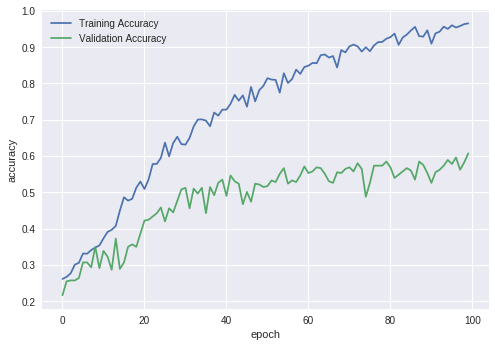

In [11]:
plt.plot(acc_control, label = 'Training Accuracy')
plt.plot(val_acc_control, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

## Try window size, no subsampling

### Apply Best Filter (window size = 15, order = 2), no Subsampling

In [17]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_4 (ELU)                  (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_4 (Average (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 165, 64)        0         
_________________________________________________________________
permute_4 (Permute)          (None, 64, 165, 1)        0         
__________

In [18]:
val_acc_best_filter_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_best_filter_only))

acc_best_filter_only = history.history['acc']
print('Max Training Accuracy:', max(acc_best_filter_only))

Max Validation Accuracy: 0.6185102
Max Training Accuracy: 0.96643025


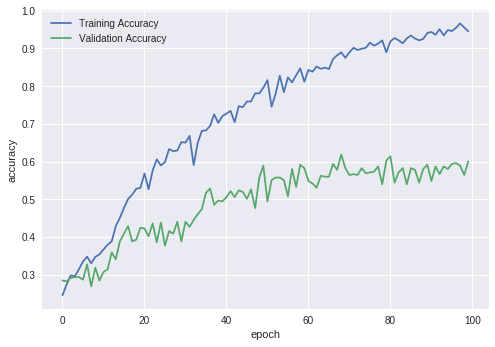

In [19]:
plt.plot(acc_best_filter_only, label = 'Training Accuracy')
plt.plot(val_acc_best_filter_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Another filter (order = 2, size = 13), no subsampling

In [25]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_8 (ELU)                  (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 165, 64)        0         
_________________________________________________________________
permute_8 (Permute)          (None, 64, 165, 1)        0         
__________

In [26]:
val_acc_filter_13_2_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_13_2_only))

acc_filter_13_2_only = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_13_2_only))

Max Validation Accuracy: 0.63656884
Max Training Accuracy: 0.9683215


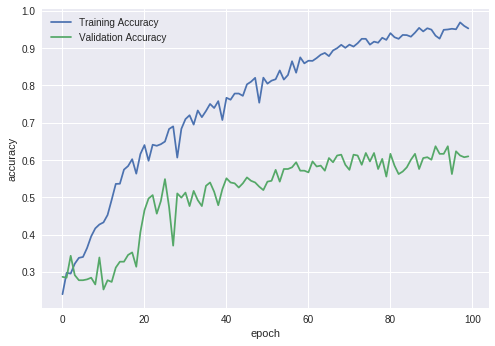

In [27]:
plt.plot(acc_filter_13_2_only, label = 'Training Accuracy')
plt.plot(val_acc_filter_13_2_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Order = 2, size = 11, no subsampling

In [32]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_12 (ELU)                 (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_12 (Averag (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 165, 64)        0         
_________________________________________________________________
permute_12 (Permute)         (None, 64, 165, 1)        0         
__________

In [33]:
val_acc_filter_11_2_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_11_2_only))

acc_filter_11_2_only = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_11_2_only))

Max Validation Accuracy: 0.6388262
Max Training Accuracy: 0.94373524


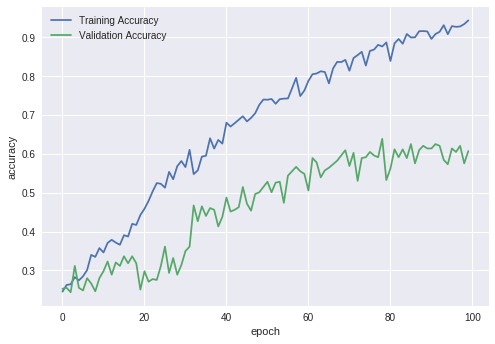

In [34]:
plt.plot(acc_filter_11_2_only, label = 'Training Accuracy')
plt.plot(val_acc_filter_11_2_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Order = 2, size = 9, no subsampling

In [39]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_16 (ELU)                 (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_16 (Averag (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 165, 64)        0         
_________________________________________________________________
permute_16 (Permute)         (None, 64, 165, 1)        0         
__________

Max Validation Accuracy: 0.64108354
Max Training Accuracy: 0.88416076


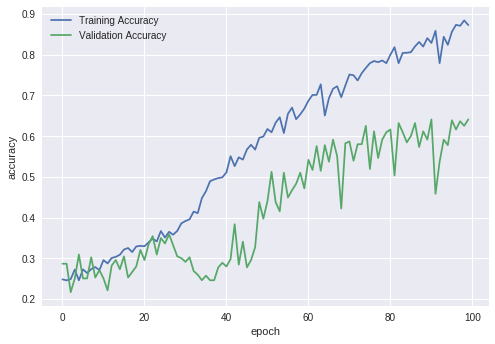

In [40]:
val_acc_filter_9_2_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_9_2_only))

acc_filter_9_2_only = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_9_2_only))

plt.plot(acc_filter_9_2_only, label = 'Training Accuracy')
plt.plot(val_acc_filter_9_2_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Order = 2, size = 7, no subsampling

In [45]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_20 (ELU)                 (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_20 (Averag (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 165, 64)        0         
_________________________________________________________________
permute_20 (Permute)         (None, 64, 165, 1)        0         
__________

Max Validation Accuracy: 0.6388262
Max Training Accuracy: 0.9536643


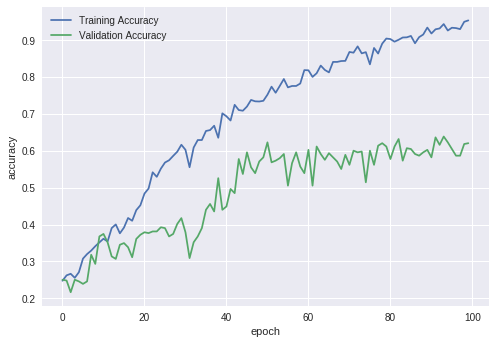

In [46]:
val_acc_filter_7_2_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_7_2_only))

acc_filter_7_2_only = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_7_2_only))

plt.plot(acc_filter_7_2_only, label = 'Training Accuracy')
plt.plot(val_acc_filter_7_2_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Order = 2, size = 5, no subsampling

In [51]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_24 (ELU)                 (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_24 (Averag (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 165, 64)        0         
_________________________________________________________________
permute_24 (Permute)         (None, 64, 165, 1)        0         
__________

Max Validation Accuracy: 0.62979686
Max Training Accuracy: 0.90543735


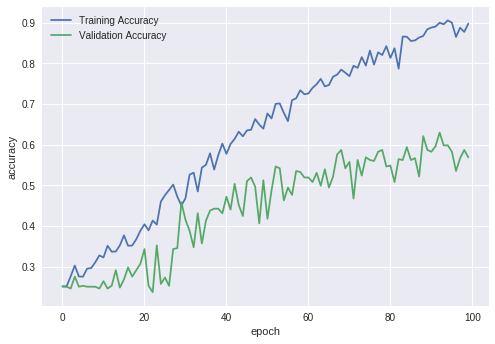

In [52]:
val_acc_filter_5_2_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_5_2_only))

acc_filter_5_2_only = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_5_2_only))

plt.plot(acc_filter_5_2_only, label = 'Training Accuracy')
plt.plot(val_acc_filter_5_2_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Overview of window size

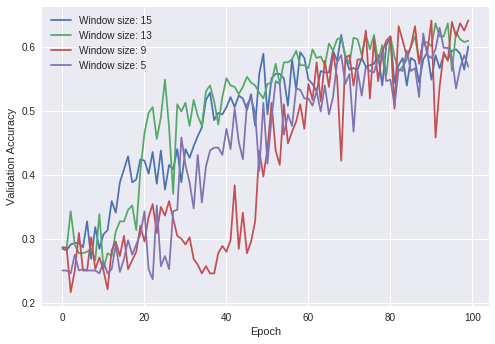

In [69]:
plt.figure()

plt.plot(val_acc_best_filter_only, label = 'Window size: 15')
plt.plot(val_acc_filter_13_2_only, label = 'Window size: 13')
# plt.plot(val_acc_filter_11_2_only, label = 'Window size: 11')
plt.plot(val_acc_filter_9_2_only, label = 'Window size: 9')
# plt.plot(val_acc_filter_7_2_only, label = 'Window size: 7')
plt.plot(val_acc_control, label = 'No filtering')



plt.plot(val_acc_filter_5_2_only, label = 'Window size: 5')

plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')

plt.legend()

plt.show()

## Try Polynomial Order, No Subsample

### order = 3, size = 13, no subsampling

In [57]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_28 (ELU)                 (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_28 (Averag (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 165, 64)        0         
_________________________________________________________________
permute_28 (Permute)         (None, 64, 165, 1)        0         
__________

Max Validation Accuracy: 0.62528217
Max Training Accuracy: 0.93475175


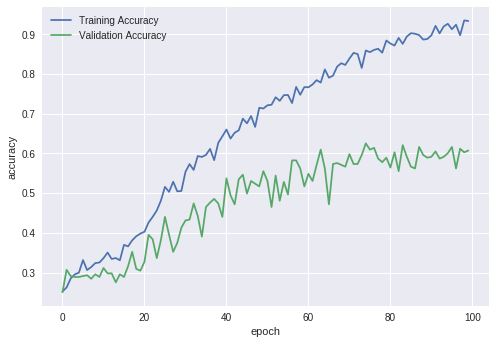

In [58]:
val_acc_filter_13_3_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_13_3_only))

acc_filter_13_3_only = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_13_3_only))

plt.plot(acc_filter_13_3_only, label = 'Training Accuracy')
plt.plot(val_acc_filter_13_3_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### order = 4, size = 13, no subsampling

In [63]:
model = create_model(subsample_scale=1, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 22, 496, 64)       704       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 22, 496, 64)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 1, 496, 64)        90176     
_________________________________________________________________
elu_32 (ELU)                 (None, 1, 496, 64)        0         
_________________________________________________________________
average_pooling2d_32 (Averag (None, 1, 165, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 1, 165, 64)        0         
_________________________________________________________________
permute_32 (Permute)         (None, 64, 165, 1)        0         
__________

Max Validation Accuracy: 0.6207675
Max Training Accuracy: 0.9527187


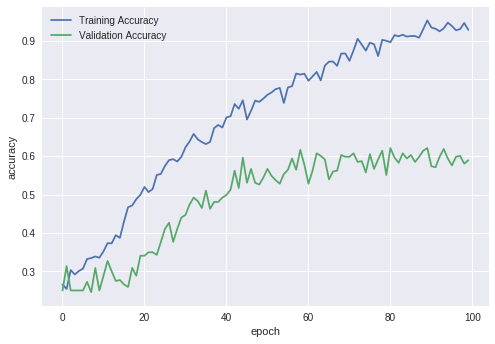

In [64]:
val_acc_filter_13_4_only = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_13_4_only))

acc_filter_13_4_only = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_13_4_only))

plt.plot(acc_filter_13_4_only, label = 'Training Accuracy')
plt.plot(val_acc_filter_13_4_only, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Overview of polynomial order

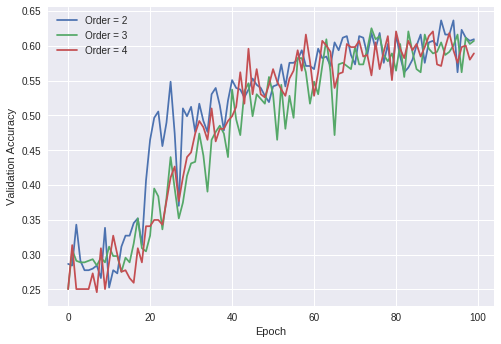

In [70]:
plt.figure()

plt.plot(val_acc_filter_13_2_only, label = 'Order = 2')
plt.plot(val_acc_filter_13_3_only, label = 'Order = 3')
plt.plot(val_acc_filter_13_4_only, label = 'Order = 4')
plt.plot(val_acc_control, label = 'No filtering')


plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')

plt.legend()

plt.show()

## Appling both Filtering and Subsampling

### size = 13, order = 2, 2 times subsampling

In [76]:
model = create_model(subsample_scale=2, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 22, 248, 64)       384       
_________________________________________________________________
re_lu_9 (ReLU)               (None, 22, 248, 64)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 1, 248, 64)        90176     
_________________________________________________________________
elu_36 (ELU)                 (None, 1, 248, 64)        0         
_________________________________________________________________
average_pooling2d_36 (Averag (None, 1, 82, 64)         0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 1, 82, 64)         0         
_________________________________________________________________
permute_36 (Permute)         (None, 64, 82, 1)         0         
__________

Max Validation Accuracy: 0.66478556
Max Training Accuracy: 0.9643026


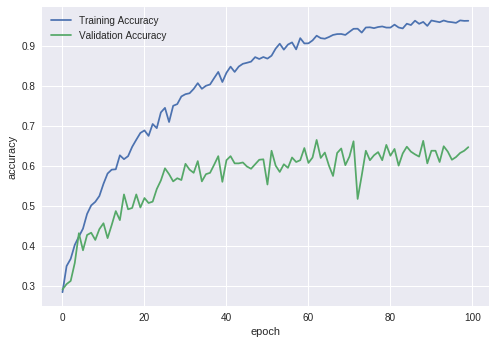

In [77]:
val_acc_filter_subsample_2 = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_subsample_2))

acc_filter_subsample_2 = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_subsample_2))

plt.plot(acc_filter_subsample_2, label = 'Training Accuracy')
plt.plot(val_acc_filter_subsample_2, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### size = 15, order = 2, 2 times subsampling

In [85]:
model = create_model(subsample_scale=2, subject=False)
history = model.fit(X_train_valid, y_train_valid, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 22, 248, 64)       384       
_________________________________________________________________
re_lu_10 (ReLU)              (None, 22, 248, 64)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 1, 248, 64)        90176     
_________________________________________________________________
elu_40 (ELU)                 (None, 1, 248, 64)        0         
_________________________________________________________________
average_pooling2d_40 (Averag (None, 1, 82, 64)         0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 1, 82, 64)         0         
_________________________________________________________________
permute_40 (Permute)         (None, 64, 82, 1)         0         
__________

Max Validation Accuracy: 0.6625282
Max Training Accuracy: 0.9617021


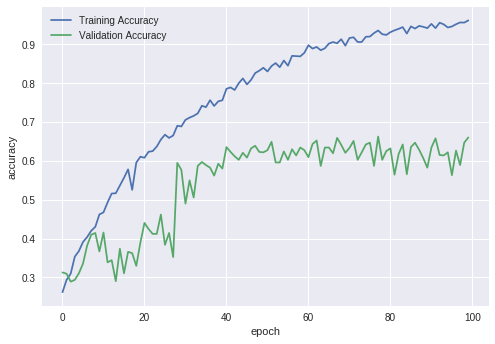

In [86]:
val_acc_filter_15_subsample_2 = history.history['val_acc']

print('Max Validation Accuracy:', max(val_acc_filter_15_subsample_2))

acc_filter_15_subsample_2 = history.history['acc']
print('Max Training Accuracy:', max(acc_filter_15_subsample_2))

plt.plot(acc_filter_15_subsample_2, label = 'Training Accuracy')
plt.plot(val_acc_filter_15_subsample_2, label = 'Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

plt.show()

### Overview of subsampling

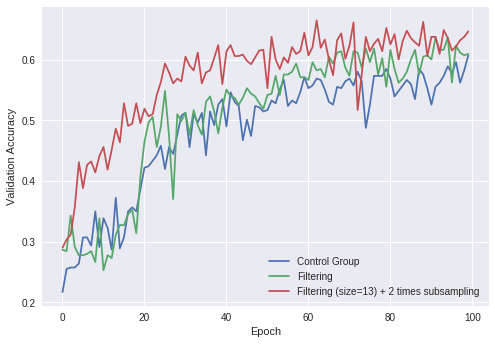

In [90]:
plt.figure()

plt.plot(val_acc_control, label = 'Control Group')
plt.plot(val_acc_filter_13_2_only, label = 'Filtering')
plt.plot(val_acc_filter_subsample_2, label = 'Filtering (size=13) + 2 times subsampling')
# plt.plot(val_acc_filter_15_subsample_2, label = 'Filtering (size=15) + 2 times subsampling')


plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')

plt.legend()

plt.show()